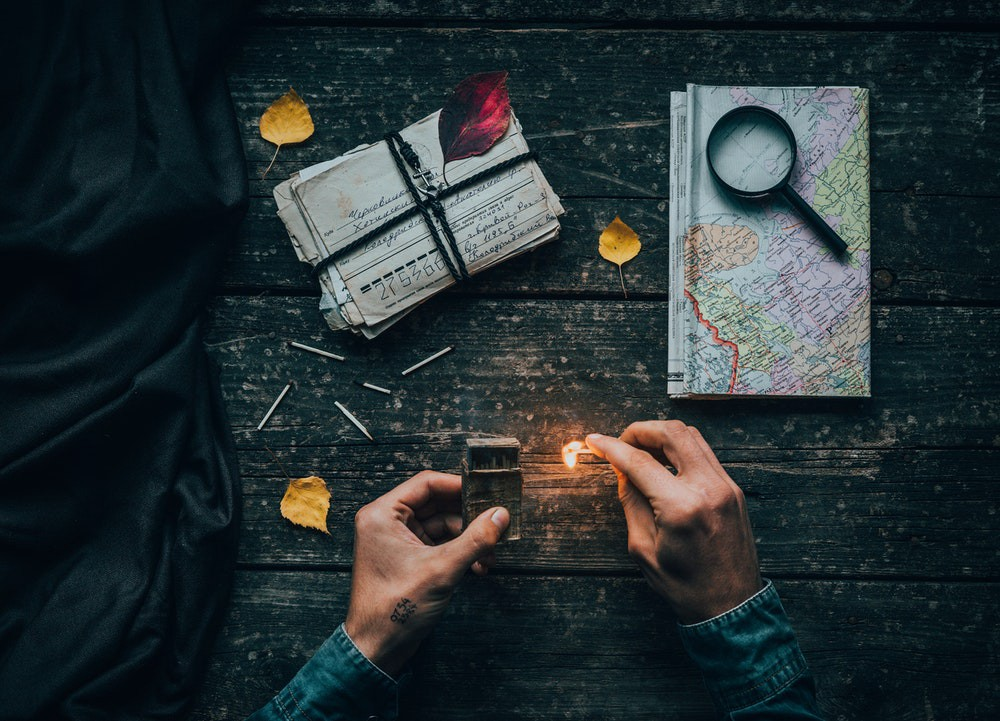

In [120]:
from IPython.display import Image
Image("eda.jpeg",width=400,height=350)

In [ ]:
#https://github.com/PacktPublishing/Hands-on-Exploratory-Data-Analysis-with-Python

In [ ]:
To discover interesting transactional patterns of different customers and countries

About dataset:
Dataset consists of transactional data with customers in different countries who make purchases from an 
online retail company based in the United Kingdom (UK) that sells unique all-occasion gifts


Company - UK-based and registered non-store online retail
Products for selling - Mainly all-occasion gifts
Customers - Most are wholesalers (local or international)
Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

<ol> 

<p>Results from EDA:</p>
 <li>The customer with the highest number of orders comes from the United Kingdom (UK)</li>
 <li> The customer with the highest money spent on purchases comes from Netherlands </li>
 <li>The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below:</li>
 - United Kingdom
 - Germany
 - France
 - Ireland (EIRE)
 - Spain
 <li> As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below:</li>
 - United Kingdom
 - Netherlands
 - Ireland (EIRE)
 - Germany
 - France
 <li> November 2011 has the highest sales</li>
 - The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December
 <li> There are no transactions on Saturday between 1st Dec 2010 - 9th Dec 2011</li>
 <li> The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward</li>
 - The company receives the highest number of orders at 12:00pm
 <li> Possibly most customers made purchases during lunch hour between 12:00pm - 2:00pm</li>
<li>The company tends to give out FREE items for purchases occasionally each month</li>
 - However, it is not clear what factors contribute to giving out the FREE items to the particular customers  
<ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
import datetime
from IPython.core.pylabtools import figsize
from matplotlib.ticker import FuncFormatter
from tabulate import tabulate
from matplotlib import pyplot

color = sns.color_palette()

In [2]:
ecommerce_data=pd.read_csv("eCommerce.csv",encoding='ISO-8859-1')

In [3]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
- InvoiceNo (invoice_num): A number assigned to each transaction
- StockCode (stock_code): Product code
- Description (description): Product name
- Quantity (quantity): Number of products purchased for each transaction
- InvoiceDate (invoice_date): Timestamp for each transaction
- UnitPrice (unit_price): Product price per unit
- CustomerID (cust_id): Unique identifier each customer
- Country (country): Country name

<b>Data Cleaning</b>

In [4]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# check out the column with missing values
ecommerce_data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
# check out the rows with missing values
ecommerce_data[ecommerce_data.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [7]:
ecommerce_data['InvoiceDate']=pd.to_datetime(ecommerce_data['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [8]:
ecommerce_data['Description']=ecommerce_data['Description'].str.lower()

In [9]:
ecommerce_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
ecommerce_data.dropna(inplace=True)

In [11]:
ecommerce_data['CustomerID']=ecommerce_data['CustomerID'].astype('int64')

In [12]:
ecommerce_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
Some observation here:
    
Quantity has negative values
Unit Price has zero values (FREE items?)

Interesting…

In [13]:
#remove quantity with negative values
ecommerce_data=ecommerce_data[ecommerce_data['Quantity']>0]

In [14]:
#To calculate the total money spent on each purchase, we simply multiply Quantity with Unit Price:
#amount_spent = quantity * unit_price
    
ecommerce_data['amount_spent']=ecommerce_data['Quantity']*ecommerce_data['UnitPrice']

In [15]:
ecommerce_data.insert(loc=5,column='year_month',value=ecommerce_data['InvoiceDate'].map(lambda x:100*x.year+x.month))
ecommerce_data.insert(loc=6, column='month',value=ecommerce_data['InvoiceDate'].dt.month)
ecommerce_data.insert(loc=7, column='day',value=ecommerce_data['InvoiceDate'].dt.dayofweek+1)
ecommerce_data.insert(loc=8, column='hour',value=ecommerce_data['InvoiceDate'].dt.hour)
ecommerce_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,year_month,month,day,hour,UnitPrice,CustomerID,Country,amount_spent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,201012,12,3,8,2.55,17850,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,201012,12,3,8,2.75,17850,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,201012,12,3,8,3.39,17850,United Kingdom,20.34


<b> Exploratory Data Analysis (EDA) </b>

<b> How many orders made by the Customers? </b>

In [17]:
#df.groupby(by=grouping_columns)[columns_to_show].function()
ecommerce_data.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


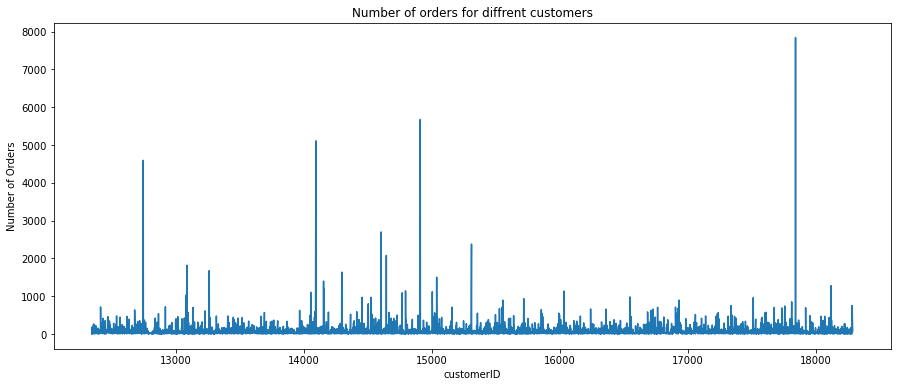

In [18]:
orders=ecommerce_data.groupby(by=['CustomerID','Country'],as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID,orders.InvoiceNo)
plt.xlabel('customerID')
plt.ylabel('Number of Orders')
plt.title('Number of orders for diffrent customers')
plt.show()

<b>Check TOP 5 Customers with most number of orders</b>

In [65]:
orders.sort_values(by='InvoiceNo',ascending=False).head()

,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


<b> How much money spent by the customers?</b>

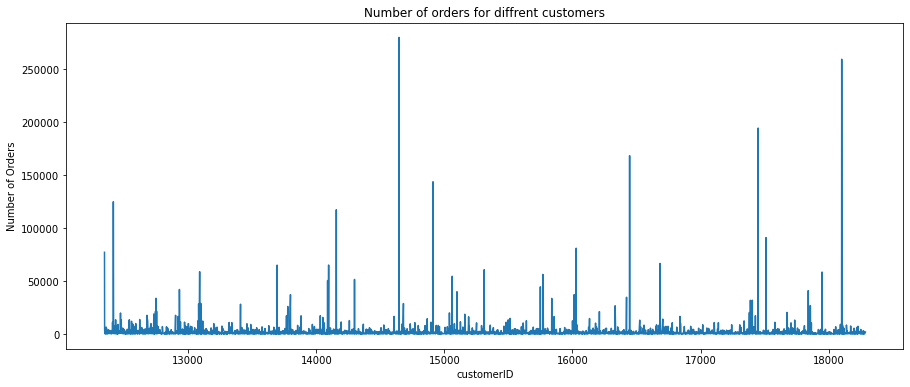

In [21]:
money_spent=ecommerce_data.groupby(by=['CustomerID','Country'],as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID,money_spent.amount_spent)
plt.xlabel('customerID')
plt.ylabel('Number of Orders')
plt.title('Number of orders for diffrent customers')
plt.show()

<b> Check TOP 5 Customers with highest money spent </b>

In [22]:
money_spent.sort_values(by='amount_spent',ascending=False).head()

,CustomerID,Country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [ ]:
From the results we observe that most orders are made in the UK and customers from Netherlands spend the highest amount of money in their purchases.

<b>Discover patterns for Number of Orders</b>

In [ ]:
How many orders (per month)?

In [24]:

ecommerce_data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index()

[201012]    1400
[201101]     987
[201102]     998
[201103]    1321
[201104]    1149
[201105]    1555
[201106]    1393
[201107]    1331
[201108]    1281
[201109]    1756
[201110]    1929
[201111]    2658
[201112]     778
Name: year_month, dtype: int64

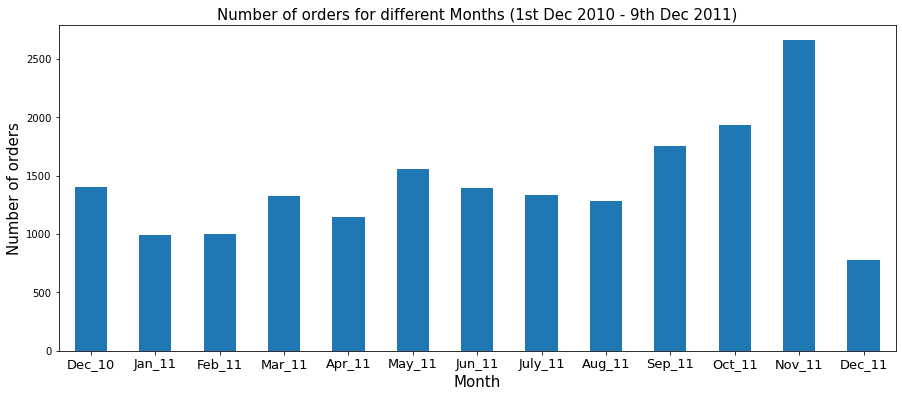

In [25]:

ax=ecommerce_data.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))

ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
Overall, we consider that the company receives the highest number of orders in November 2011 since we do not have the full month of data for December 2011.

In [ ]:
How many orders (per day)?

In [26]:
ecommerce_data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

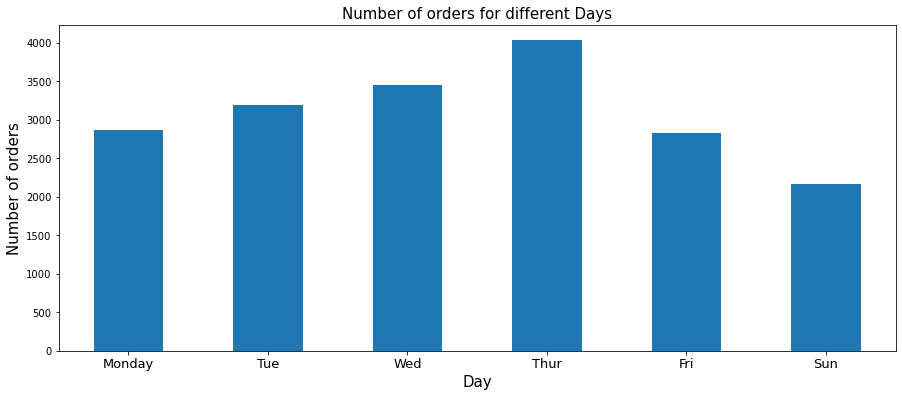

In [27]:

ax=ecommerce_data.groupby('InvoiceNo')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))

ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Monday','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
Surprisingly, there are no transactions on Saturday throughout the whole period ( 1st Dec 2010–9th Dec 2011). 
Reasons behind are left for discussion as the dataset and its context are limited.

We also spot a trend where the number of orders received by the company tends to increases from Monday to Thursday and decrease afterward.

In [ ]:
How many orders (per hour)?

In [28]:
ecommerce_data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1394
[10]    2226
[11]    2276
[12]    3129
[13]    2637
[14]    2275
[15]    2038
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: hour, dtype: int64

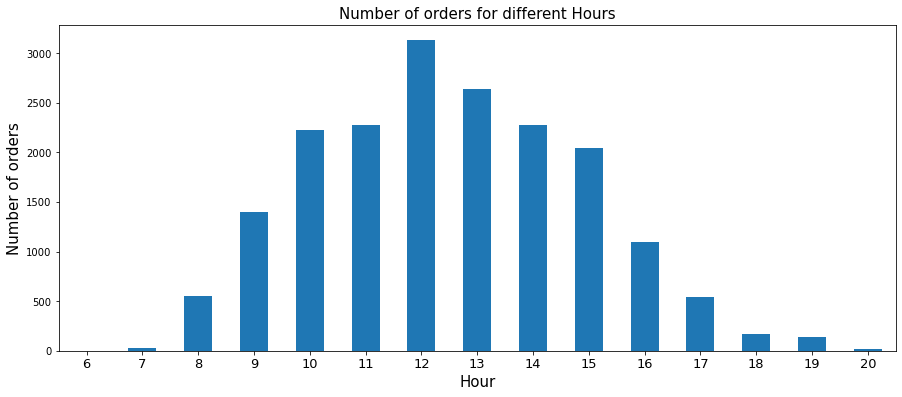

In [29]:

ax=ecommerce_data.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))

ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

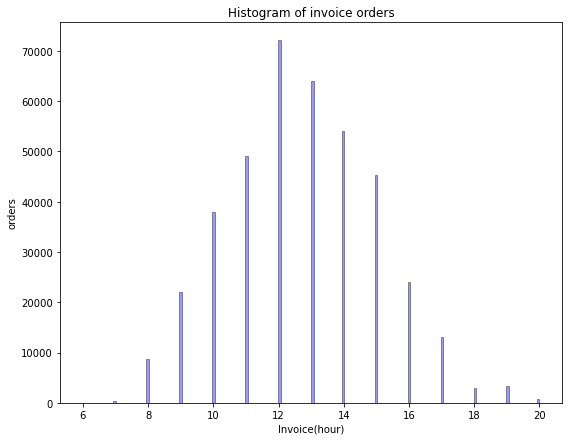

In [68]:
figsize(9, 7)

sns.distplot(ecommerce_data.hour, hist=True, kde=False, 
             bins=int(180), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of invoice orders')
plt.xlabel('Invoice(hour)'); plt.ylabel('orders');

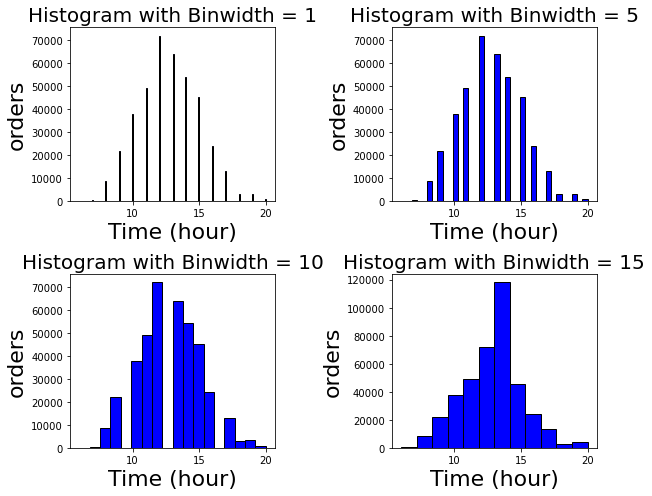

In [69]:
# Show 4 different binwidths
for i, binwidth in enumerate([1,5,10,15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(ecommerce_data.hour, bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 20)
    ax.set_xlabel('Time (hour)', size = 22)
    ax.set_ylabel('orders', size= 22)

plt.tight_layout()
plt.show()

In [ ]:
In terms of hours, there are no transactions after 8:00pm until the next day at 6:00am.
Besides, we notice that the company receives the highest number of orders at 12:00pm. 
One of the reasons could be due to the fact that most customers make purchases during lunch hour between 12:00pm — 2:00pm.

In [103]:
ecommerce_data.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [ ]:
We see that there are unit price = 0 (FREE items)
There are some free items given to customers from time to time

/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


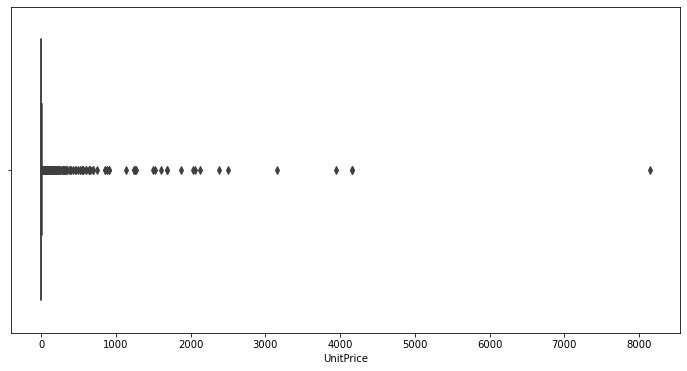

In [30]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(ecommerce_data.UnitPrice)
plt.show()

In [ ]:
Before we move our attention to the zero values (FREE items) of unit price, we make a boxplot to check the distribution of the unit price for all products.
We observe that 75% of the data has unit price of less than 3.75 dollars — which indicates most products are relatively cheap. 
Only minority of them has high prices per unit (Again, we assume each price per unit follows the same currency).

In [31]:
ecommerce_free=ecommerce_data[ecommerce_data.UnitPrice==0]
ecommerce_free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,year_month,month,day,hour,UnitPrice,CustomerID,Country,amount_spent
9302,537197,22841,round cake tin vintage green,1,2010-12-05 14:02:00,201012,12,7,14,0.0,12647,Germany,0.0
33576,539263,22580,advent calendar gingham sack,4,2010-12-16 14:36:00,201012,12,4,14,0.0,16560,United Kingdom,0.0
40089,539722,22423,regency cakestand 3 tier,10,2010-12-21 13:45:00,201012,12,2,13,0.0,14911,EIRE,0.0
47068,540372,22090,paper bunting retrospot,24,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom,0.0
47070,540372,22553,plasters in tin skulls,24,2011-01-06 16:41:00,201101,1,4,16,0.0,13081,United Kingdom,0.0



Number of unique values => 10




/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


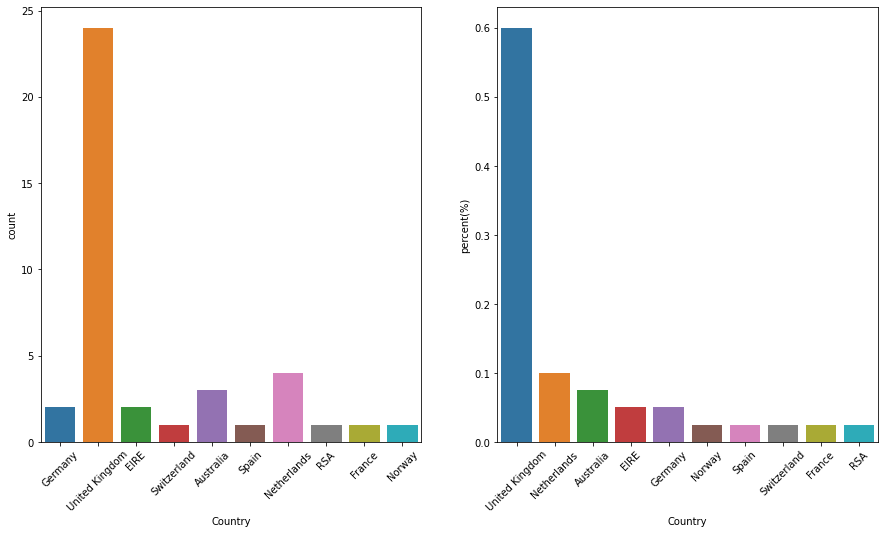

╒════╤════════════════╤══════════════╤═════════╕
│    │ Country        │   percent(%) │   count │
╞════╪════════════════╪══════════════╪═════════╡
│  0 │ United Kingdom │        0.6   │      24 │
├────┼────────────────┼──────────────┼─────────┤
│  1 │ Netherlands    │        0.1   │       4 │
├────┼────────────────┼──────────────┼─────────┤
│  2 │ Australia      │        0.075 │       3 │
├────┼────────────────┼──────────────┼─────────┤
│  3 │ EIRE           │        0.05  │       2 │
├────┼────────────────┼──────────────┼─────────┤
│  4 │ Germany        │        0.05  │       2 │
├────┼────────────────┼──────────────┼─────────┤
│  5 │ Norway         │        0.025 │       1 │
├────┼────────────────┼──────────────┼─────────┤
│  6 │ Spain          │        0.025 │       1 │
├────┼────────────────┼──────────────┼─────────┤
│  7 │ Switzerland    │        0.025 │       1 │
├────┼────────────────┼──────────────┼─────────┤
│  8 │ France         │        0.025 │       1 │
├────┼──────────────

In [64]:
df=ecommerce_free

def univariate_categorical(x):
   print('\nNumber of unique values => ' + str(len(df[x].unique())) + '\n\n')   
   plt.figure(figsize=(15, 8))
   y = "count"
   plt.subplot(1, 2, 1)
   g=sns.countplot(df[x])
   g.set_xticklabels(g.get_xticklabels(), rotation=45)
   count_df = df[x].value_counts().rename(y).reset_index().rename(columns={"index":x})
   y = "percent(%)"
   percent_df = df[x].value_counts(normalize=True).rename(y).reset_index().rename(columns={"index":x})
   plt.subplot(1, 2, 2)
   gg=sns.barplot(percent_df[x], percent_df[y], data=percent_df) 
   gg.set_xticklabels(gg.get_xticklabels(), rotation=45)
   plt.show()
   print(tabulate(pd.merge(percent_df, count_df, how='inner'), headers='keys', tablefmt='fancy_grid'))


univariate_categorical("Country")

In [33]:
ecommerce_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

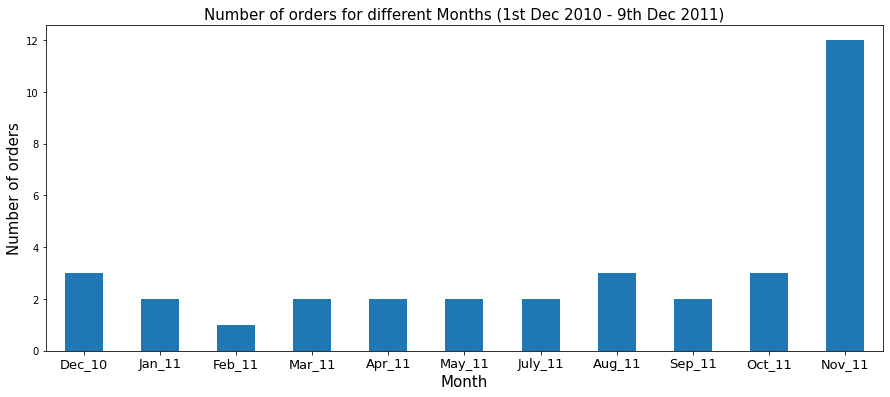

In [34]:
ax=ecommerce_free.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))

ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of orders', fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
Not clear why there are FREE items given to certain customers
On average, the company gave out 2-4 times FREE items to customers each month (Except in June 2011)


In [ ]:
Discover patterns for each Country

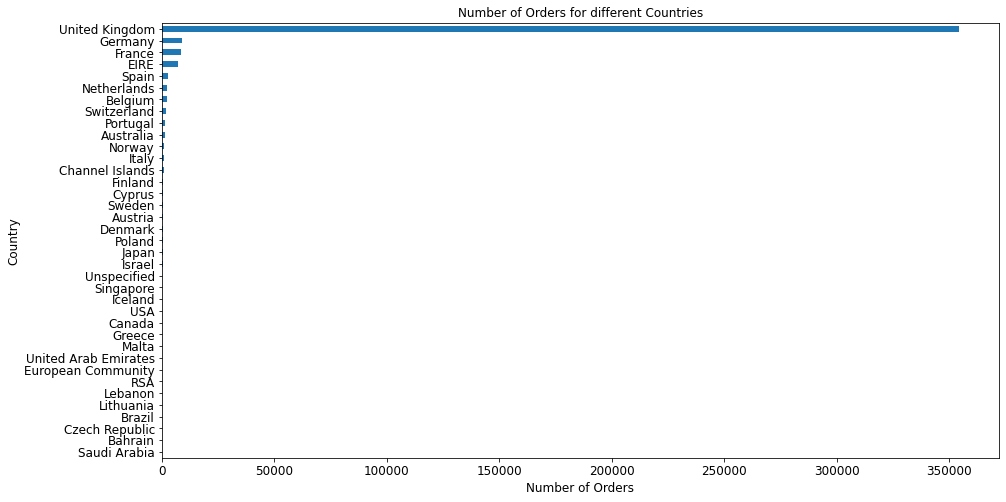

In [35]:
group_country_orders = ecommerce_data.groupby('Country')['InvoiceNo'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Orders/Countries')

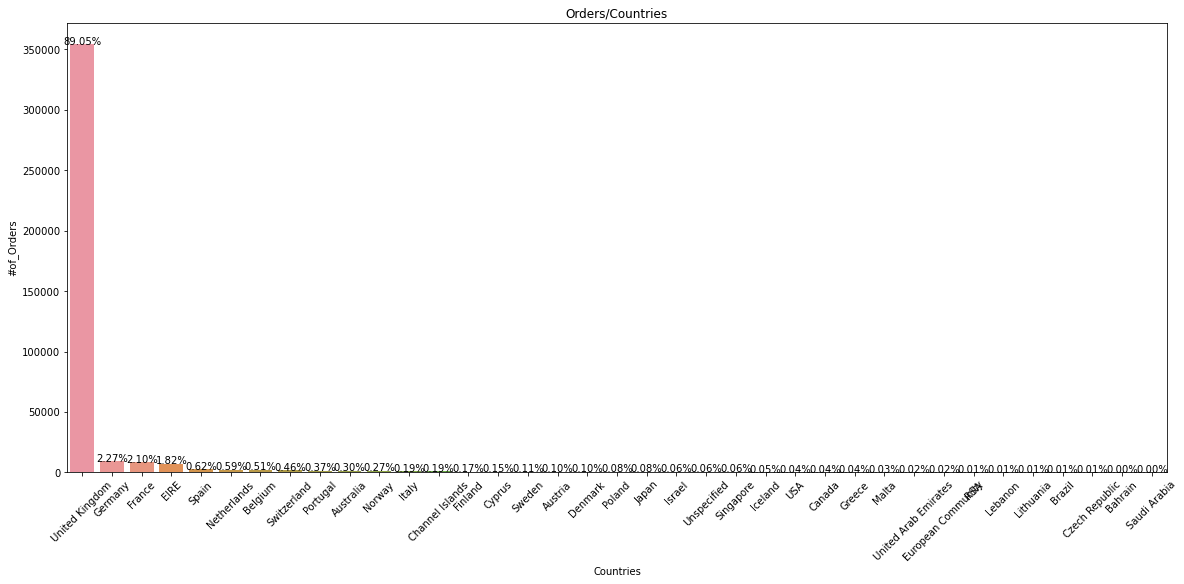

In [36]:
descending_order = ecommerce_data['Country'].value_counts(normalize=True).sort_values(ascending=False).index

a4_dims = (19.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
g=sns.countplot(ax=ax,x="Country",data=ecommerce_data,order=descending_order)

g.set_xticklabels(g.get_xticklabels(), rotation=45)
total = float(len(ecommerce_data))

g.set_xlabel("Countries")
g.set_ylabel("#of_Orders")


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format(100*height/total),
            ha="center") 
plt.title('Orders/Countries')

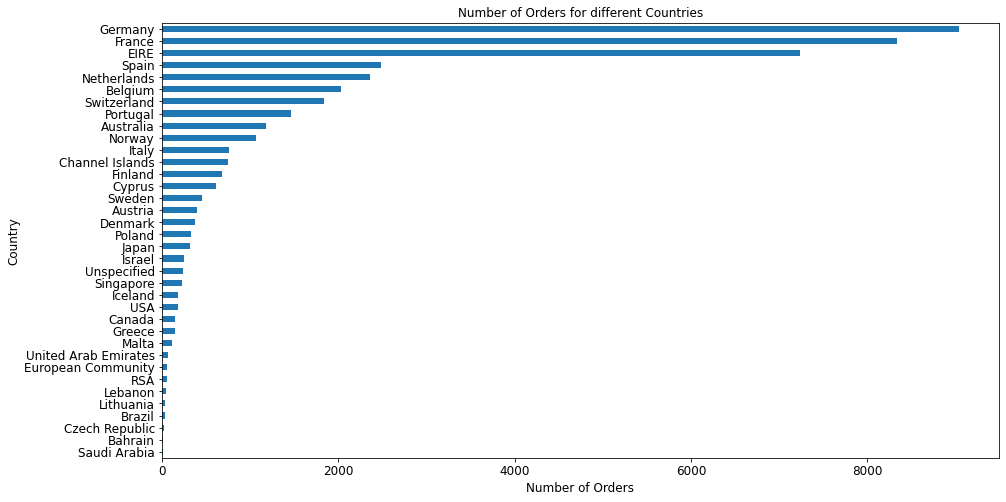

In [37]:
group_country_orders = ecommerce_data.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

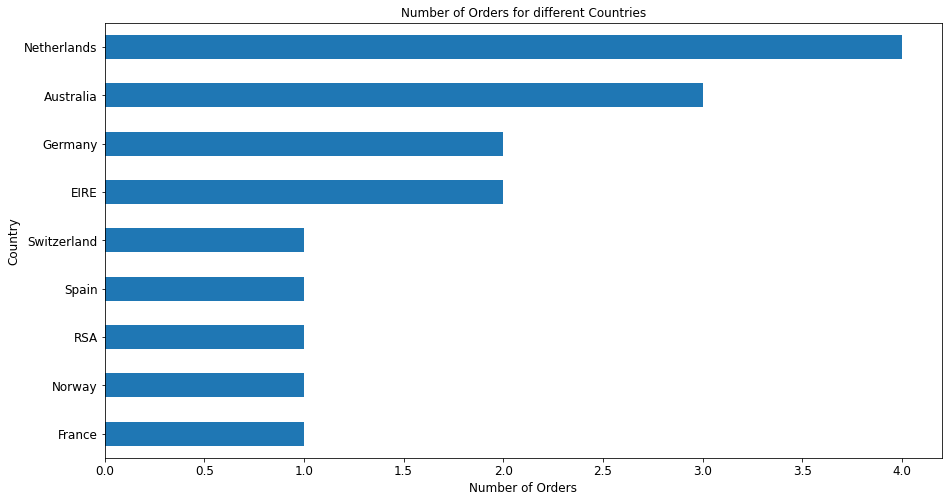

In [66]:
group_country_orders = ecommerce_free.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()


<b>How much money spent by each country?</b>

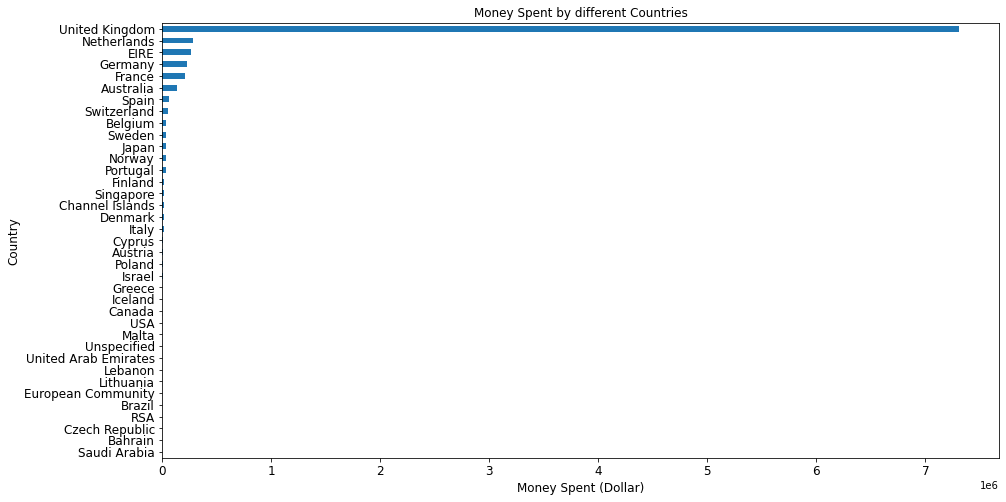

In [39]:

group_country_amount_spent = ecommerce_data.groupby('Country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

<b> which countries had higher invoices and how much they have spent(Other than UK)  </b>

In [46]:
ecommerce_non_free=ecommerce_data[ecommerce_data.UnitPrice!=0]
countries_payment=ecommerce_non_free[['Country','amount_spent']]

In [47]:
countries_payment['freq']=countries_payment.groupby('Country')['Country'].transform('count')
countries_payment['sum_payment']=countries_payment.groupby('Country').amount_spent.transform('sum')
countries_payment['sum_payment']=round(countries_payment['sum_payment'])
countries_payment.drop(['amount_spent'],axis=1,inplace=True)
countries_payment.drop_duplicates(inplace=True)

/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aydafarhadi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [48]:
#select other than UK as top is UK
countries_payment=countries_payment.iloc[1:,:]

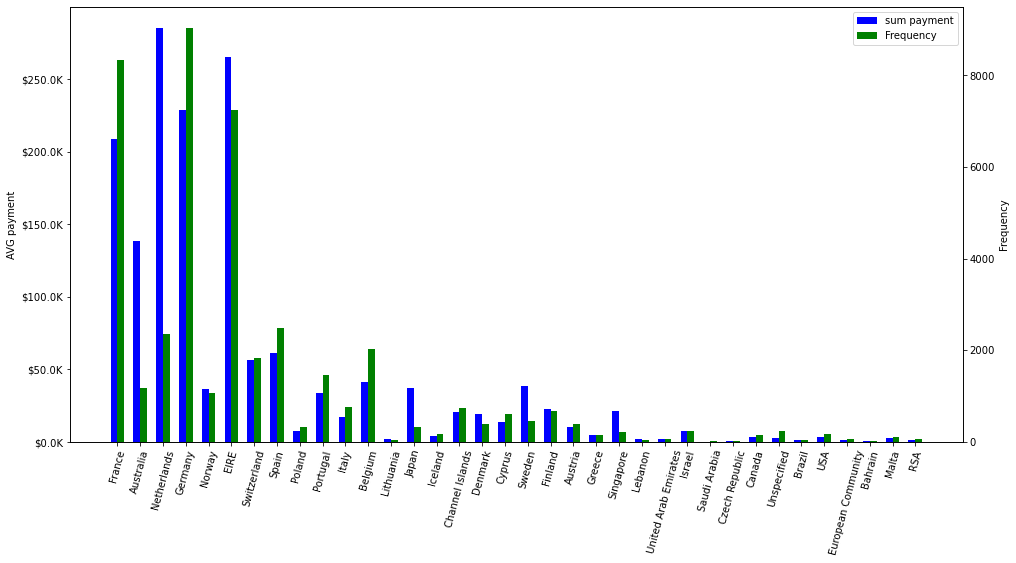

In [49]:
plt.figure(figsize=(16,8))

def thousands(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1f' % (x * 1e-3)
    return f'${x * 1e-3:1.1f}K'
formatter = FuncFormatter(thousands)


x = np.arange(36)
ax1 = plt.subplot(1,1,1)
w = 0.3
plt.xticks(x + w /2, countries_payment['Country'], rotation=75)
pay =ax1.bar(x, countries_payment['sum_payment'], width=w, color='b', align='center')
ax1.yaxis.set_major_formatter(formatter)
plt.ylabel('AVG payment')

ax2 = ax1.twinx()
#We have calculated GDP by dividing gdpPerCapita to population.
freq =ax2.bar(x + w, countries_payment['freq'], width=w,color='g',align='center')


#Set the Y axis label as GDP.
plt.ylabel('Frequency')
#To set the legend on the plot we have used plt.legend()
plt.legend([pay, freq],['sum payment', 'Frequency'])
#To show the plot finally we have used plt.show().
plt.show()
#plt.savefig('payment_accounts.png')